## Geomapping in Python

Author: [Erika Fille Legara](https://eflegara.github.io)

Copyright © 2018, 2019 Erika Fille Legara. All rights reserved.

This notebook was written, conceptualized, and prepared for the Data Visualization and Storytelling course under AIM's MS in Data Science program. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

---

To manage expecations, this notebook is introductory/basic. The purpose is to acquaint the user/reader to the different basic tools in mapping geodata/geo information.

In this recipe, we explore [geopandas](http://geopandas.org/). Specifically, we look at how we can use it to read [shapefiles](https://en.wikipedia.org/wiki/Shapefile) that we can then use to build [choropleths](https://en.wikipedia.org/wiki/Choropleth_map). 


<img src='preview.png' width=750 title='preview'>

Our data source is the [GADM database](https://gadm.org/) of Global Administrative Areas. GADM provides the shapes (outline) of a country's administrative regions. 


Note: I have previously written similar notebooks \[[1](https://nbviewer.jupyter.org/github/eflegara/PythonMaps/blob/master/Maps%20Part%20I.ipynb), [2](https://nbviewer.jupyter.org/github/eflegara/PythonMaps/blob/master/Maps%20Part%20II.ipynb)\]; however, geopandas was not used. 

---

First things first, let's load the necessary packages. If you're having problems installing geopandas and you're on conda, _try_ the following:

```bash

$ conda install -c conda-forge geopandas
$ conda install -c conda-forge fiona

```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geopandas

%matplotlib notebook

### Loading the Shapefiles

Here, we load the shapefiles for the Philippines. Shapefiles provide us with geometric information presented as ‘points’, ‘polylines’, or ‘polygons’. The shapefiles for this notebook have been pre-downloaded from [GADM](http://www.gadm.org/). For the Philippines, the GADM website provides four different administrative levels: country, provincial, city, and barangay levels. I was really surprised (happily surprised) that they even have the boundaries down to the barangay level. 

Good job, Internet and open data!

We then read all files and store them in the variables `ph0`, `ph1`, `ph2`, and `ph3` using `geopandas`. 

In [2]:
ph0 = geopandas.GeoDataFrame.from_file("./PHL_adm_shp/PHL_adm0.shp")
ph1 = geopandas.GeoDataFrame.from_file("./PHL_adm_shp/PHL_adm1.shp")
ph2 = geopandas.GeoDataFrame.from_file("./PHL_adm_shp/PHL_adm2.shp")
ph3 = geopandas.GeoDataFrame.from_file("./PHL_adm_shp/PHL_adm3.shp")

We can then query these dataframes the way we query a typical pandas dataframe.

In [3]:
ph1.describe()

,ID_0,ID_1,CCN_1
count,81.0,81.000000,81.0
mean,179.0,41.000000,0.0
std,0.0,23.526581,0.0
min,179.0,1.000000,0.0
25%,179.0,21.000000,0.0
50%,179.0,41.000000,0.0
75%,179.0,61.000000,0.0
max,179.0,81.000000,0.0


### Drawing the maps

Before we explore the dataframes and what we can do with them, let's first have a quick look at the maps these shapefiles can generate. Here, we visualize what we mean by "different administrative region levels". 

- Country Level: `ph0`
- Provincial Level: `ph1`
- Municipality Level: `ph2` 
- Barangay Level: `ph3`

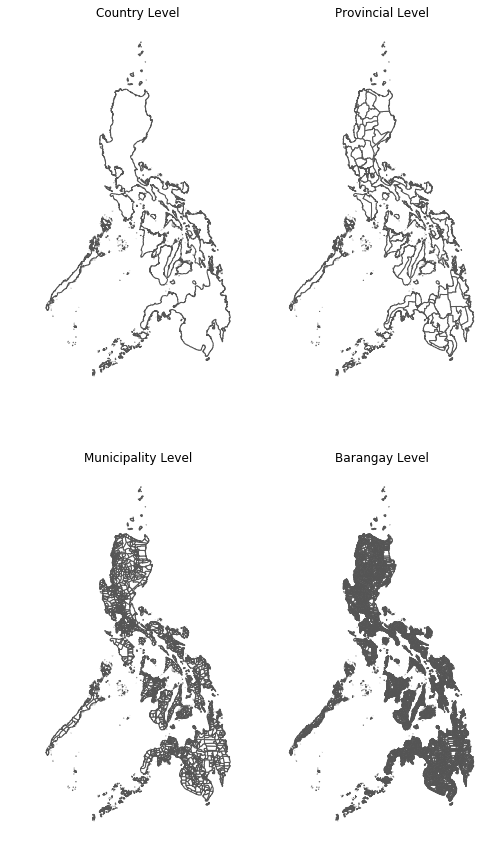

In [4]:
fig, axes = plt.subplots(2,2, figsize=(8,15), frameon=False);

ph0.plot(ax=axes[0][0], color='white', edgecolor = '#555555');
ph1.plot(ax=axes[0][1], color='white', edgecolor = '#555555');
ph2.plot(ax=axes[1][0], color='white', edgecolor = '#555555');
ph3.plot(ax=axes[1][1], color='white', edgecolor = '#555555');


## Below, we "prettify" the plot by removing borders
## Here, we also add titles for each map (level)
adm_lvl = ["Country Level", "Provincial Level", "Municipality Level", "Barangay Level"]
i = 0
for ax in axes:
    for axx in ax:        
        axx.set_title(adm_lvl[i])
        i = i+1
        axx.axis('off')

### Explore Geopandas DFs

Now, let's explore the dataframe for each of these geo-dataframes and obtain the different information we can extract from them.

#### Country Level

In [5]:
ph0.head()

,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,NAME_FRENC,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,179,PHL,Philippines,PHILIPPINES,Philippines,Pilipinas,None,Philippines,None,Philippines,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,(POLYGON ((119.4669418334961 4.586939811706657...


#### Provincial Level

In [6]:
ph1.head(n=3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,179,PHL,Philippines,1,Abra,PH.AB,0,1401,Lalawigan|Probinsya,Province,None,None,"POLYGON ((120.9679489135743 17.95705986022955,..."
1,179,PHL,Philippines,2,Agusan del Norte,PH.AN,0,1602,Lalawigan|Probinsya,Province,None,None,"POLYGON ((125.5772399902345 9.456789970397892,..."
2,179,PHL,Philippines,3,Agusan del Sur,PH.AS,0,1603,Lalawigan|Probinsya,Province,None,None,"POLYGON ((125.9108734130859 8.856249809265194,..."


We can focus on a provincial name like `Maguindanao` where I was born and raised (trivia).

In [7]:
ph1[ph1.NAME_1=='Maguindanao']

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
43,179,PHL,Philippines,44,Maguindanao,PH.MG,0,1538,Lalawigan|Probinsya,Province,None,None,"(POLYGON ((124.196243286133 7.190080165863094,..."


#### City Level

In [8]:
ph2.head(n=3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,179,PHL,Philippines,1,Abra,1,Bangued,PH.AB.BN,0,140101,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.6155319213867 17.62360000610374,..."
1,179,PHL,Philippines,1,Abra,2,Boliney,PH.AB.BL,0,140102,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.9074935913087 17.41933059692406,..."
2,179,PHL,Philippines,1,Abra,3,Bucay,PH.AB.BU,0,140103,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((120.7454833984377 17.57670974731451,..."


In the city level dataframe, we can query all cities belonging to the province of Maguindanao (`NAME_1=='Maguindanao'`).

In [9]:
ph2[ph2.NAME_1=='Maguindanao'].head(n=3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
902,179,PHL,Philippines,44,Maguindanao,899,Ampatuan,PH.MG.AP,0,153801,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((124.5206069946289 6.867489814758301,..."
903,179,PHL,Philippines,44,Maguindanao,900,Barira,PH.SF.BR,0,158401,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((124.3479766845707 7.389679908752498,..."
904,179,PHL,Philippines,44,Maguindanao,901,Buldon,PH.SF.BD,0,158402,Bayan|Munisipyo,Municipality,None,None,"POLYGON ((124.4865188598635 7.444009780883789,..."


In the city level dataframe, we can query also query for a specific city like Cotabato City, my hometown (`NAME_2=='Cotabato City'`). Note the change in variable name: `NAME_1` (province name) and `NAME_2` (city name).

In [10]:
ph2[ph2.NAME_2=='Cotabato City'].head(n=3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
907,179,PHL,Philippines,44,Maguindanao,904,Cotabato City,PH.MG.CT,0,129804,Lungsod|Siyudad,City,None,None,"POLYGON ((124.2275695800782 7.254580020904598,..."


For the barangay level, the same template is used. Column `NAME_3` contains the barangay names.

#### Coordinate System
Since we are dealing with geo dataframes, it is important (arguably, depending on the purpose) to know what your coordinate system is. It can be useful in calculating distances, areas, etc.

In [11]:
ph2.crs

{'init': 'epsg:4326'}

In [12]:
## Calculating the area
ph2[ph2.NAME_1=='Maguindanao'].geometry.to_crs({'init': 'epsg:3123'})\
               .map(lambda p: p.area / 10**6)

902    344.179605
903    133.990681
904    319.286016
905     31.617917
906     22.646673
907     83.568199
908    137.148713
909     30.814965
910    394.424243
911    351.871946
912    142.829412
913     82.067688
914     73.953761
915     85.757658
916     98.490937
917     60.655052
918     71.710811
919     69.009056
920     32.521158
921     80.828273
922    141.962427
923    111.416873
924    275.318165
925     17.024562
926     44.240062
927    158.804770
928     82.291313
929     62.960767
930    375.136043
931    215.441797
932     33.390880
933     83.021441
934    108.706172
935     46.195921
936    396.978317
Name: geometry, dtype: float64

### Exploring Geometries

Let's look at the `geometry` column of geo-dataframe `ph1` and see some of the information we can obtain from the elements of the geoseries.

In [13]:
ph1.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'HASC_1', 'CCN_1', 'CCA_1',
       'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1', 'geometry'],
      dtype='object')

In [14]:
ph1.iloc[0]

ID_0                                                       179
ISO                                                        PHL
NAME_0                                             Philippines
ID_1                                                         1
NAME_1                                                    Abra
HASC_1                                                   PH.AB
CCN_1                                                        0
CCA_1                                                     1401
TYPE_1                                     Lalawigan|Probinsya
ENGTYPE_1                                             Province
NL_NAME_1                                                 None
VARNAME_1                                                 None
geometry     POLYGON ((120.9679489135743 17.95705986022955,...
Name: 0, dtype: object

Let's look at the "geometry" for Abra.

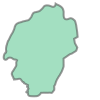

In [15]:
ph1.geometry[0]

In [16]:
type(ph1.geometry[0])

shapely.geometry.polygon.Polygon

We can see that the series element is a shapely object.

**Boundaries**. It may be useful to obtain the boundaries of the shape/polygon, or the area, or even the centroid. In the next three cells, we obtain these measures, respectively. 

In [17]:
print ("Boundaries: ", ph1.geometry[0].bounds)

Boundaries:  (120.46719360351585, 17.15698051452648, 121.1227035522461, 17.978069305420036)


In [18]:
print ("Area: ", ph1.geometry[0].area)

Area:  0.3380418088054401


In [19]:
print ("Centroid (x,y): ", ph1.geometry[0].centroid.x, ", ", ph1.geometry[0].centroid.y)

Centroid (x,y):  120.80553596624674 ,  17.579237507095932


## Building Choropleths

In this exercise, we look at some census data and build [choropleth maps](https://en.wikipedia.org/wiki/Choropleth_map). We focus, in particular, on the population count per municipality. 

In [20]:
psa_df = pd.read_excel("Municipality Data.xlsx", sheet_name="PSA")
psa_df.columns = ["source","municipality", "1960", "1970", "1975", "1980",
                 "1990", "1995", "2000", "2007", "2010", "2015", "is_total", "shp_province", "shp_municipality"]
psa_df.head(n=3)

,source,municipality,1960,1970,1975,1980,1990,1995,2000,2007,2010,2015,is_total,shp_province,shp_municipality
0,ABRA,ABRA,115193.0,145058.0,147010.0,160198.0,184743.0,195964.0,209491.0,230953.0,234733.0,241160.0,1,NaN,NaN
1,ABRA,BANGUED (CAPITAL),19368.0,24587.0,25597.0,28666.0,34184.0,35450.0,38965.0,46179.0,43936.0,48163.0,0,Abra,Bangued
2,ABRA,BOLINEY,2326.0,3175.0,2902.0,3060.0,3773.0,3156.0,3340.0,3349.0,4063.0,3573.0,0,Abra,Boliney


In the code cell above, we just made the dataframe look more "readable" by chaging the header names. The column `is_total` tells us whether the row is the total count for the province or not since in the dataset they also aggregate the counts per province. Again, here, we are looking at population per municipality.

That is, if we want to focus on municipality data, we need to filter the dataframe and drop all rows that provide the total census count for the province. In code speak, we filter out rows where `is_total == 1`.

In [21]:
psa_df_muni = psa_df[psa_df.is_total == 0]

To create the choropleth, we need to make sure that the two dataframes (`psa_df_muni` and `ph2`, our geopandas dataframe) are properly "communicating" to each other. That is, `ph2` should know that its column `NAME_2` represents (or is the same as) column `shp_municipality` in the `psa_df_muni`. We need these two to be the same to `merge( )` the two dataframes. 

In [22]:
merged = ph2.merge(psa_df_muni, left_on='NAME_2', right_on='shp_municipality')

Below is the resulting merged dataframe.

In [23]:
merged.head(n=3)

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,...,1980,1990,1995,2000,2007,2010,2015,is_total,shp_province,shp_municipality
0,179,PHL,Philippines,1,Abra,1,Bangued,PH.AB.BN,0,140101,...,28666.0,34184.0,35450.0,38965.0,46179.0,43936.0,48163.0,0,Abra,Bangued
1,179,PHL,Philippines,1,Abra,2,Boliney,PH.AB.BL,0,140102,...,3060.0,3773.0,3156.0,3340.0,3349.0,4063.0,3573.0,0,Abra,Boliney
2,179,PHL,Philippines,1,Abra,3,Bucay,PH.AB.BU,0,140103,...,12375.0,13346.0,14499.0,14881.0,16266.0,17126.0,17115.0,0,Abra,Bucay


In [24]:
## The dataframe merged is a geopandas dataframe with geometry info, 
## which is necessary in creating the choropleth map.

type(merged)

geopandas.geodataframe.GeoDataFrame

### Now, we map.

We are drawing a map of the Philippines at the municipality level. Let's plot the population count for year 2015. For purpose of illustration, let us cluster the 2015 values into 5 segments (`colors=5`) with equal intervals. 

This is implemented in the code cell below.

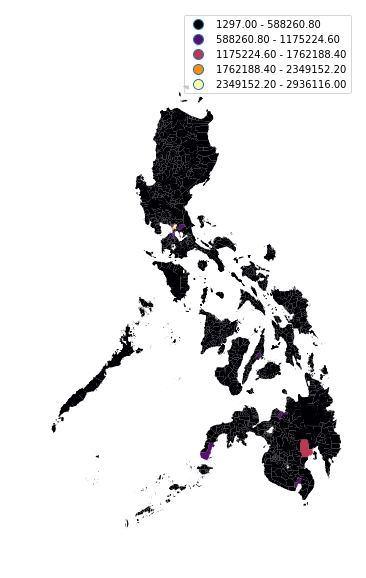

In [25]:
colors = 5
cmap = 'inferno'
figsize = (8, 10)
ax = merged.plot(column='2015', cmap=cmap, figsize=figsize, 
                          scheme='equal_interval', k=colors, legend=True)
ax.axis('off');

Now, what if we only want to focus on a specific provice like `Metropolitan Manila`? 

That's actually straightforward to do as shown below. Below, I'm using a different colormap... _just because_...

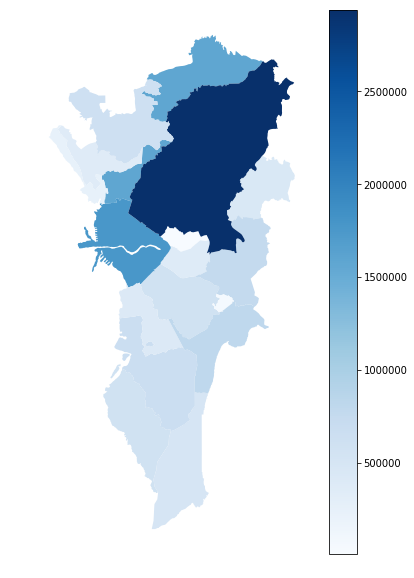

In [26]:
colors = 5
cmap = 'Blues'
figsize = (8, 10)
ax = merged[merged["NAME_1"] == "Metropolitan Manila"].plot(column="2015", 
                                                            cmap=cmap, figsize=figsize,
                                                            k=colors, legend=True)
ax.axis('off');

Let's add some municipality names on the map.

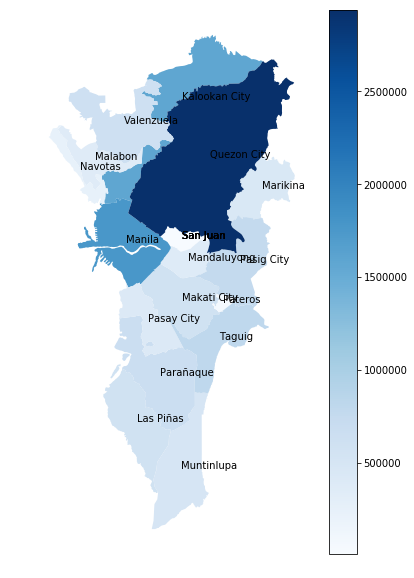

In [27]:
colors = 5
cmap = 'Blues'
figsize = (8, 10)
ax = merged[merged["NAME_1"] == "Metropolitan Manila"].plot(column="2015", 
                                                            cmap=cmap, figsize=figsize,
                                                            k=colors, legend=True)

for ind, row in merged[merged["NAME_1"] == "Metropolitan Manila"].iterrows():
    ax.text(row["geometry"].centroid.x,row["geometry"].centroid.y, row["NAME_2"])

ax.axis('off');

Of course, when mapping we need to also think about how we can normalize the numbers/values. This is, however, outside the scope of this intro to geopandas notebook.

## Event density information

In this section, we plot the earthquake occurrences in the Philippines. This is quite easy to implement when you have the data. 

First, we download our data from the USGS website. 

Earthquake data: https://earthquake.usgs.gov/earthquakes/search/

I've pre-downloaded the dataset and stored the information in `query.csv`.

In [28]:
df = pd.read_csv("query.csv")
df.head(n=3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2018-04-15T19:43:56.180Z,17.8842,122.2737,40.70,5.2,mb,NaN,111.0,5.034,1.14,...,2018-04-15T21:00:11.392Z,"38km E of Awallan, Philippines",earthquake,8.8,7.4,0.065,77.0,reviewed,us,us
1,2018-04-11T23:54:01.350Z,7.3264,126.5159,156.77,4.9,mb,NaN,115.0,0.963,0.80,...,2018-04-12T00:10:54.040Z,"1km S of San Pedro, Philippines",earthquake,10.0,6.1,0.064,77.0,reviewed,us,us
2,2018-04-05T03:53:41.320Z,6.8146,126.7800,64.44,5.9,mww,NaN,42.0,1.218,0.78,...,2018-04-09T01:50:57.040Z,"45km SE of Tarragona, Philippines",earthquake,5.8,5.2,0.073,18.0,reviewed,us,us


Let's see what we have here.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3563 entries, 0 to 3562
Data columns (total 22 columns):
time               3563 non-null object
latitude           3563 non-null float64
longitude          3563 non-null float64
depth              3563 non-null float64
mag                3563 non-null float64
magType            3563 non-null object
nst                1408 non-null float64
gap                3562 non-null float64
dmin               2154 non-null float64
rms                3563 non-null float64
net                3563 non-null object
id                 3563 non-null object
updated            3563 non-null object
place              3563 non-null object
type               3563 non-null object
horizontalError    1483 non-null float64
depthError         2978 non-null float64
magError           2120 non-null float64
magNst             3121 non-null float64
status             3563 non-null object
locationSource     3563 non-null object
magSource          3563 non-null object
d

Even without geopandas or any geomapping tool, we can actually already look at the density/distribution of events. Below, we just create a scatter plot where x is the longitude and y the latitude of the occurrence. Further, we differentiate the events by magnitude (thru color and size) as implemented below.

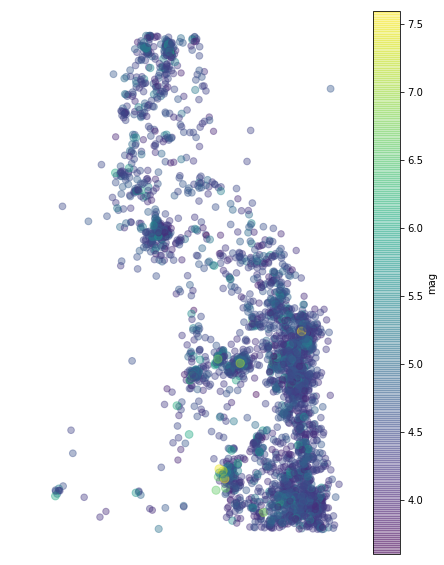

In [30]:
df.plot.scatter('longitude', 'latitude', c='mag', 
                s=df['mag']*10, colormap='viridis', alpha = .4, figsize=(7,10));
ax = plt.gca();
ax.axis('off');

Now, let's superimpose this scatterplot on an actual map. 

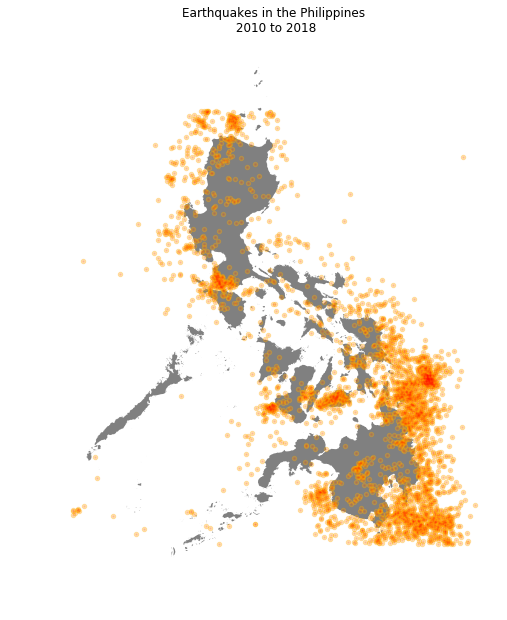

In [31]:
fig, ax = plt.subplots(1, figsize=(8,10))

## This is the shapefile
base = ph0.plot(ax=ax, color='gray')

## Below is the scatter plot
df.plot.scatter(x="longitude", y = "latitude", alpha=0.3, ax=base, color='orange')
df.plot.scatter(x="longitude", y = "latitude", alpha=0.1, ax=base, color='red', s=2)
ax.axis('off');
ax.set_title("Earthquakes in the Philippines\n 2010 to 2018");

#### What if we want to focus on a specific region? 

Again, straightforward. Let's try Maguindanao. We just need to select the specific rows where `NAME_1` is "Maguindanao". The tricky part is choosing which specific datapoints in the earthquake dataframe `df` to include.

What needs to be done first is to identify the boundaries of Bohol. For this, we need to look at the `geometry` column of the geodataframe. From there, we can query the `bounds` property of the geometry; this returns a DataFrame of minx, miny, maxx, maxy values of geometry objects.

We implement this in the cell below.

In [32]:
province = 'Bohol'
bounds =  ph1[ph1['NAME_1']==province].geometry.bounds
[minx, miny, maxx, maxy] = bounds.values.tolist()[0]

print(maxx,maxy,minx,miny)

124.64546966552746 10.265560150146484 123.68113708496105 9.48583030700695


Once the boundaries are identified, it's now easy to select the datapoints that fall inside this boundary. See implementation below.

In [33]:
df[(maxx > df.longitude) & (minx < df.longitude) & (miny < df.latitude) & (maxy < df.latitude)].head(n=3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
45,2018-01-31T14:32:57.210Z,11.9057,124.5158,10.00,4.5,mb,NaN,135.0,4.115,0.90,...,2018-02-15T13:32:44.040Z,"7km ESE of Santo Nino, Philippines",earthquake,8.9,1.4,0.106,26.0,reviewed,us,us
63,2018-01-16T16:51:54.180Z,11.5000,124.2388,35.00,4.4,mb,NaN,97.0,12.545,0.35,...,2018-04-10T01:11:42.040Z,"16km NW of San Isidro, Philippines",earthquake,7.7,2.0,0.149,15.0,reviewed,us,us
65,2018-01-16T07:04:09.640Z,11.5880,124.4314,34.08,4.7,mb,NaN,107.0,4.630,0.88,...,2018-04-10T01:11:42.040Z,"4km NE of Naval, Philippines",earthquake,12.5,6.2,0.100,30.0,reviewed,us,us


In [34]:
# Select earthquake datapoints that fall inside the boundary
sdf = df[(maxx > df.longitude) & (minx < df.longitude) & (miny < df.latitude) & (maxy > df.latitude)];

sdf.head(n=3)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
198,2017-08-10T00:43:19.030Z,9.4980,124.0866,524.62,5.0,mb,NaN,21.0,2.828,0.91,...,2017-10-25T00:38:06.040Z,"10km S of Lila, Philippines",earthquake,9.0,5.8,0.046,153.0,reviewed,us,us
276,2017-05-24T14:08:07.630Z,9.7355,124.5407,41.12,4.5,mb,NaN,71.0,2.841,0.72,...,2017-08-10T01:34:00.040Z,"0km ENE of Candabong, Philippines",earthquake,9.1,8.2,0.096,32.0,reviewed,us,us
957,2015-11-24T08:36:55.040Z,9.8462,124.2518,10.00,4.5,mb,NaN,112.0,7.351,1.37,...,2016-02-18T04:48:52.040Z,"3km E of Buenavista, Philippines",earthquake,13.7,1.9,0.145,14.0,reviewed,us,us


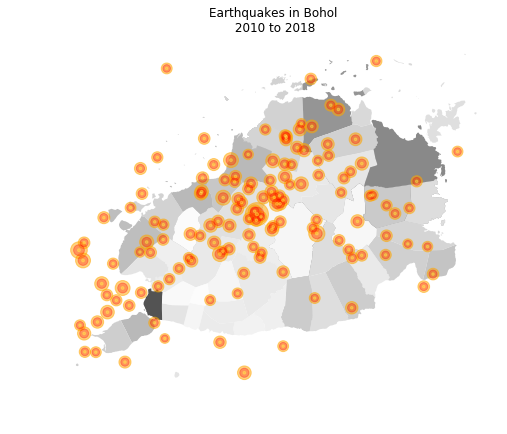

In [35]:
# Plot the region
#base = ph1[ph1["NAME_1"]==province].plot(color='gray', figsize=(10,10));
base = merged[merged["NAME_1"] == province].plot(column="2015",
                                                 cmap=plt.cm.binary, figsize=figsize,
                                                 k=colors)


# Identify the bounds
bounds =  ph1[ph1["NAME_1"]==province].geometry.bounds
[minx, miny, maxx, maxy] = bounds.values.tolist()[0]

# Plot the datapoints (as scatterplots)
sdf.plot(x="longitude", y = "latitude", kind="scatter", c = "orange", 
         s=sdf['mag']**3*1.5, alpha=0.5, ax=base);
sdf.plot(x="longitude", y = "latitude", kind="scatter", c = "red", 
         s=sdf['mag']**2.5*1.5, alpha= 0.3, ax=base);
sdf.plot(x="longitude", y = "latitude", kind="scatter", c = "yellow", 
         s=sdf['mag']**1*1.5, alpha= 0.3, ax=base);
sdf.plot(x="longitude", y = "latitude", kind="scatter", c = "white", 
         s=sdf['mag']**1*1.5, alpha= 0.1, ax=base);


ax = plt.gca();
ax.axis('off');
ax.set_title('Earthquakes in ' + str(province) + '\n 2010 to 2018');


## Plotly
Then there's plotly.

In [36]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

Below, we play with the different functions and arguments when using pyplot for geomapping. Some of the numbers in the dataset are made-up

In [37]:
sdf.head(n=2)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
198,2017-08-10T00:43:19.030Z,9.4980,124.0866,524.62,5.0,mb,NaN,21.0,2.828,0.91,...,2017-10-25T00:38:06.040Z,"10km S of Lila, Philippines",earthquake,9.0,5.8,0.046,153.0,reviewed,us,us
276,2017-05-24T14:08:07.630Z,9.7355,124.5407,41.12,4.5,mb,NaN,71.0,2.841,0.72,...,2017-08-10T01:34:00.040Z,"0km ENE of Candabong, Philippines",earthquake,9.1,8.2,0.096,32.0,reviewed,us,us


In [38]:
sdf['date']  = pd.to_datetime(df.time).dt.date
sdf['text'] = 'date: ' + sdf['date'].astype(str) + ' ' + 'mag: ' + sdf['mag'].astype(str) + '\n' + 'depth: ' + sdf['depth'].astype(str)

data = [ go.Scattergeo(
        locationmode = 'ISO-3',
        lon = sdf['longitude'],
        lat = sdf['latitude'],
        text = sdf['text'],
        mode = 'markers',
        marker = dict( 
            size = sdf['mag']**1.1*1.5, 
            opacity = 0.8,
            reversescale = False,
            autocolorscale = True,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            #colorscale = 'Viridis',
            cmin = 0,
            color = sdf['mag'],
            cmax = sdf['mag'].max(),
            colorbar=dict(
                title="Earthquakes in Bohol"
            )
        ))]

layout = dict(
        title = 'Earthquakes in Bohol<br>(Hover for date, mag, and depth)', 
        geo = dict(
            scope = 'asia',
            resolution = 50,
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            lonaxis = go.layout.geo.Lonaxis(
                range= [ minx-1, maxx+1 ] , 
            ),
            lataxis = go.layout.geo.Lataxis(
                range= [ miny-.5, maxy+.3 ]
            )
        ),
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig, validate=False, filename='bohol-earthquake')

In [39]:
df = pd.read_csv("query.csv")
df.time = pd.to_datetime(df.time)

In [40]:
time_series = go.Scatter(
    name='Earthquake Through the Years',
    x=df.time,
    y=df.mag,
    mode='markers',
    text = df.time.dt.date.astype(str) + ', ' + df.place,
    marker={'size': df.mag**1.5,
            'color': df.mag,
            'reversescale': False,
            'autocolorscale': True,
            'cmin': 3,
            'cmax': sdf['mag'].max(),
            'opacity': 0.6,
            'colorscale': 'YlOrRd'
           })

layout = go.Layout(
    yaxis=dict(title='Magnitude'),
    xaxis=dict(title='Date'),
    showlegend = False)

fig = go.Figure(data=[time_series], layout=layout)
iplot(fig)